# Pretty Visitors 

## Data Science - Sprint 3

### Variáveis:
• Diabetes_012: 0 = sem diabetes 1 = pré-diabetes 2 = diabetes

• HighBP: 0 = sem pressão alta 1 = pressão alta

• HighChol: 0 = sem colesterol alto 1 = colesterol alto

• CholCheck: 0 = não fez verificação de colesterol nos últimos 5 anos 1 = fez verificação de
colesterol nos últimos 5 anos

• BMI: Índice de Massa Corporal

• Smoker: Você já fumou pelomenos 100 cigarros em toda a sua vida? [Nota: 5 maços = 100
cigarros] 0 = não 1 = sim

• Stroke: (Alguma vez lhe disseram que) você teve um derrame. 0 = não 1 = sim

• HeartDiseaseorAttack: Doença cardíaca coronariana (DCC) ou infarto do miocárdio (IM)
0 = não 1 = sim

• PhysActivity: Atividade física nos últimos 30 dias - excluindo trabalho 0 = não 1 = sim

• Fruits: Consumo de frutas 1 ou mais vezes por dia 0 = não 1 = sim

• Veggies: Consumo de vegetais 1 ou mais vezes por dia 0 = não 1 = sim

• HvyAlcoholConsump: Bebedores excessivos (homens adultos que consomem mais de 14
bebidas por semana e mulheres adultas que consomem mais de 7 bebidas por semana) 0 =
não 1 = sim

• AnyHealthcare: Possui algum tipo de cobertura de saúde, incluindo seguro de saúde,
planos pré-pagos como HMO, etc. 0 = não 1 = sim

• NoDocbcCost: Houve algum momento nos últimos 12 meses em que você precisou
consultar um médico, mas não pôde devido ao custo? 0 = não 1 = sim

• GenHlth: Você diria que, em geral, sua saúde é: escala de 1 a 5 1 = excelente 2 = muito boa
3 = boa 4 = regular 5 = ruim
2

• MentHlth: Agora pensando sobre sua saúde mental, que inclui estresse, depressão e
problemas emocionais, por quantos dias nos últimos 30 dias sua saúde mental não esteve
boa? escala de 1 a 30 dias

• PhysHlth: Agora pensando sobre sua saúde física, que inclui doença física e lesões, por
quantos dias nos últimos 30 dias sua saúde física não esteve boa? escala de 1 a 30 dias

• DiffWalk: Você tem grande dificuldade para caminhar ou subir escadas? 0 = não 1 = sim

• Sex: 0 = feminino 1 = masculino

• Age: Categoria de idade em 13 níveis (_AGEG5YR ver código) 1 = 18-24 9 = 60-64 13 =
80 anos ou mais

• Education: Nível de educação escala de 1 a 6 1 = Nunca frequentou a escola ou apenas
jardim de infância 2 = Da 1ª à 8ª série (Ensino Fundamental) 3 = Da 9ª à 11ª série (Algum
Ensino Médio) 4 = 12ª série ou GED (Ensino Médio completo) 5 = Faculdade de 1 a 3 anos
(Alguma faculdade ou escola técnica) 6 = Faculdade de 4 anos ou mais (Graduado)

• Income: Escala de renda escala de 1 a 8 

1 = menos de $10,000 

5 = menos de $35,000 

8 = $75,000 ou mais

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
df = pd.read_csv("Diabetes.csv")

## Limpeza inicial do dataset

In [51]:
null_counts = df.isnull().sum()
null_counts

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [52]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [53]:
duplicate_count = df.duplicated().sum()

print(duplicate_count)

23899


In [54]:
duplicates = df[df.duplicated()]

duplicates

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,6.0,6.0
253550,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,6.0,8.0
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0


In [55]:
df.drop_duplicates()

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [56]:
# For a specific column
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get rows with outliers
df_cleaned = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

df_cleaned

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [61]:
df.max()

Diabetes_012             2.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Sex                      1.0
Age                     13.0
Education                6.0
Income                   8.0
dtype: float64

In [62]:
# Para a coluna 'MentHlth'
Q1_ment = df['MentHlth'].quantile(0.25)
Q3_ment = df['MentHlth'].quantile(0.75)
IQR_ment = Q3_ment - Q1_ment

# Limites para outliers
lower_bound_ment = Q1_ment - 1.5 * IQR_ment
upper_bound_ment = Q3_ment + 1.5 * IQR_ment

# Para a coluna 'PhysHlth'
Q1_phys = df['PhysHlth'].quantile(0.25)
Q3_phys = df['PhysHlth'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys

# Limites para outliers
lower_bound_phys = Q1_phys - 1.5 * IQR_phys
upper_bound_phys = Q3_phys + 1.5 * IQR_phys

# Filtrar os dados, mantendo apenas os valores dentro dos limites (sem outliers)
df_cleaned = df[
    (df['MentHlth'] >= lower_bound_ment) & (df['MentHlth'] <= upper_bound_ment) &
    (df['PhysHlth'] >= lower_bound_phys) & (df['PhysHlth'] <= upper_bound_phys)
]

# Exibir o DataFrame limpo
df_cleaned

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Estatisticas Descritivas e Matriz de Correlação

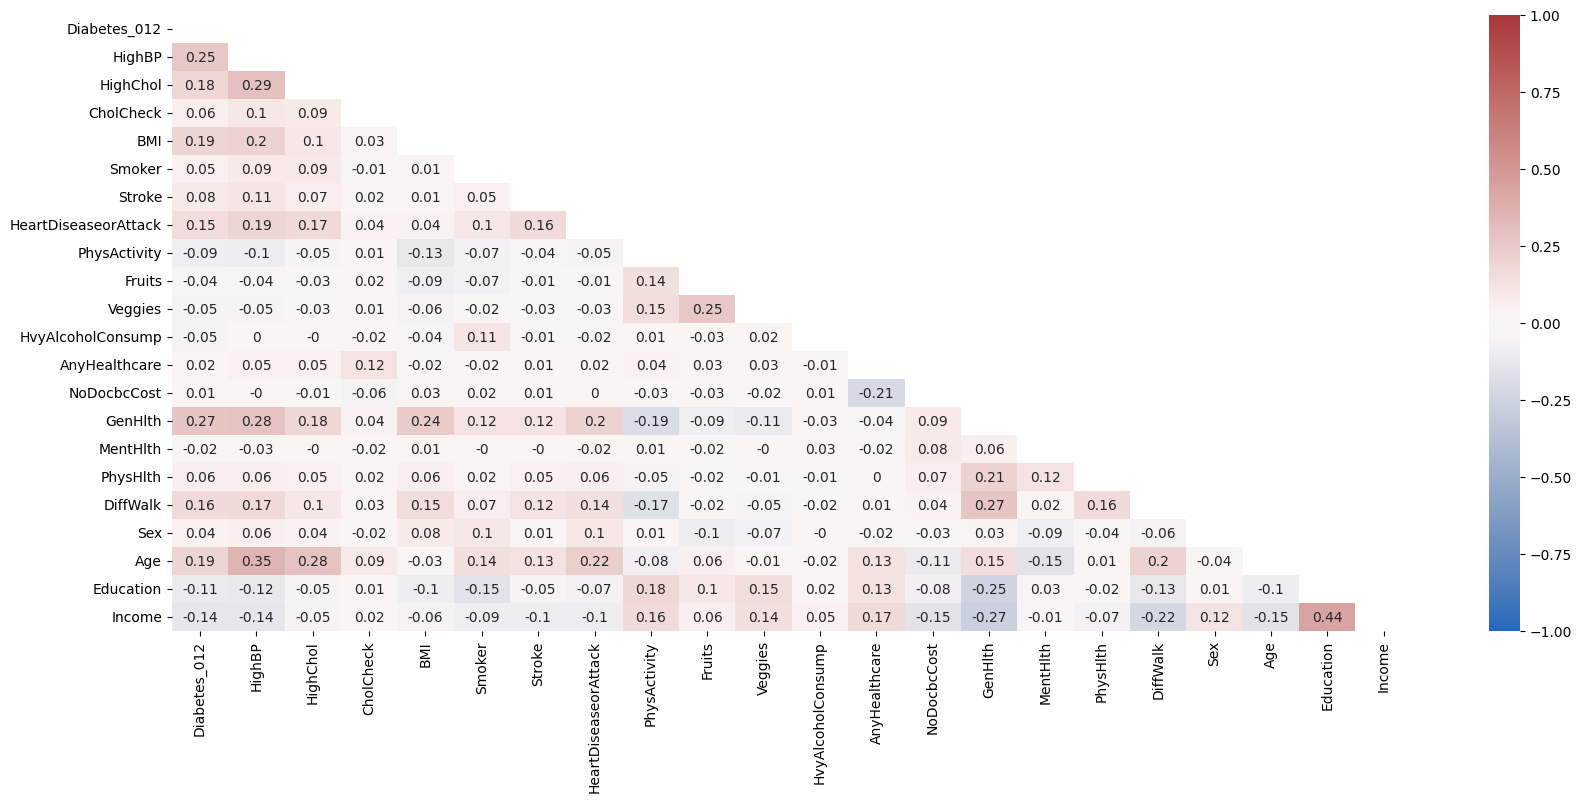

In [79]:
# Assuming matrix and mask are already defined
matrix = df_cleaned.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Increase the plot size using figsize
plt.figure(figsize=(20, 8))  # Change (12, 8) to your preferred dimensions

# Create the heatmap
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

# Show the plot
plt.show()

Media de cada uma das variáveis

In [81]:
df_cleaned.mean()

Diabetes_012             0.243049
HighBP                   0.394966
HighChol                 0.397052
CholCheck                0.961298
BMI                     27.952142
Smoker                   0.411409
Stroke                   0.027981
HeartDiseaseorAttack     0.071859
PhysActivity             0.801422
Fruits                   0.650962
Veggies                  0.825351
HvyAlcoholConsump        0.055634
AnyHealthcare            0.955352
NoDocbcCost              0.055999
GenHlth                  2.242029
MentHlth                 0.502505
PhysHlth                 0.690263
DiffWalk                 0.087886
Sex                      0.461748
Age                      8.019845
Education                5.129481
Income                   6.351415
dtype: float64

Mediana de cada uma das variáveis

In [87]:
df_cleaned.median()

Diabetes_012             0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                1.0
BMI                     27.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        0.0
AnyHealthcare            1.0
NoDocbcCost              0.0
GenHlth                  2.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      8.0
Education                5.0
Income                   7.0
dtype: float64

A moda de cada uma das variáveis

In [88]:
df_cleaned.mode()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,8.0


Desvio Padrão de cada uma das variáveis

In [92]:
df_cleaned.std()

Diabetes_012            0.641255
HighBP                  0.488845
HighChol                0.489288
CholCheck               0.192885
BMI                     6.169581
Smoker                  0.492090
Stroke                  0.164919
HeartDiseaseorAttack    0.258255
PhysActivity            0.398930
Fruits                  0.476667
Veggies                 0.379668
HvyAlcoholConsump       0.229215
AnyHealthcare           0.206530
NoDocbcCost             0.229920
GenHlth                 0.891332
MentHlth                1.217272
PhysHlth                1.533568
DiffWalk                0.283130
Sex                     0.498536
Age                     3.066862
Education               0.956296
Income                  1.899177
dtype: float64

Variancia de cada uma das variáveis

In [93]:
df_cleaned.var()

Diabetes_012             0.411208
HighBP                   0.238969
HighChol                 0.239403
CholCheck                0.037205
BMI                     38.063733
Smoker                   0.242153
Stroke                   0.027198
HeartDiseaseorAttack     0.066696
PhysActivity             0.159145
Fruits                   0.227212
Veggies                  0.144147
HvyAlcoholConsump        0.052540
AnyHealthcare            0.042655
NoDocbcCost              0.052863
GenHlth                  0.794472
MentHlth                 1.481752
PhysHlth                 2.351830
DiffWalk                 0.080163
Sex                      0.248538
Age                      9.405644
Education                0.914501
Income                   3.606875
dtype: float64

Amplitude de cada uma das variáveis

In [97]:
df_cleaned.max() - df_cleaned.min()

Diabetes_012             2.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     86.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
AnyHealthcare            1.0
NoDocbcCost              1.0
GenHlth                  4.0
MentHlth                 5.0
PhysHlth                 7.0
DiffWalk                 1.0
Sex                      1.0
Age                     12.0
Education                5.0
Income                   7.0
dtype: float64

Através do comando describe do pandas é possível visualizar de uma vez só a média, desvio padrão, os 3 quartils (já que o quarto quartil são todos os números acima do Q3); temos o máximo e o mínimo também

In [98]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000
